In [1]:
import random
import numpy as np
from statistics import mean
from random import randrange
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time
import sys
from scipy.spatial import distance
%matplotlib inline

## Load Data

load both train and test data

In [4]:
train_small = np.genfromtxt(
        'datasets/MNIST_train_small.csv', delimiter=',')
test_small = np.genfromtxt('datasets/MNIST_test_small.csv', delimiter=',')

In [5]:
X_train_small, y_train_small, X_test_small, y_test_small = train_small[:,1:], train_small[:,0], test_small[:,1:], test_small[:,0]

## K-Nearest Neighbor

In [6]:
class KNearestNeighbors():
    """ K-nearest neighbour aka KNN classifier
    
    Parameters
    -------------
    k : int classes
    p : int parameter p in Minkowski Distance calculation
    
    Attributes
    -------------
    
    """
    
    # initialize parameters in KNN model
    def __init__(self, k, p=2):
        self.k = k
        self.p = p    
    
    def compute_distance(self, X_test):
        distances=distance.cdist(X_test,self.X_train,'minkowski', p = self.p)
        return distances
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test):
        
        #compute distances between 
        distances = self.compute_distance(X_test)
        
        #generate predictions
#         for i in range(n_test):
#             y_index = np.argsort(distances[i, :])
#             k_closests = self.y_train[y_index[:self.k]].astype(int)
#             y_pred[i] = np.argmax(np.bincount(k_closests))
            
        y_indices = np.argsort(distances)
        k_closests = self.y_train[y_indices[:,:self.k]].astype(int)
        bincount = np.array([np.count_nonzero(k_closests == j, axis = 1) for j in range(10)]).transpose()
        
        #random selection
        max_bin_values = np.amax(bincount,axis=1)
        a = np.array([bincount[j] == max_bin_values[j] for j in range(max_bin_values.shape[0])])
        y_pred = np.array([])
        for row in a:
            tmp = np.asarray(np.nonzero(row)).reshape(-1)
            y_pred = np.append(y_pred,np.random.choice(tmp,1,replace=False))      
#         y_pred = np.argmax(bincount,axis = 1)            
        
        return y_pred
        

## Sanity Check

In [7]:
knn = KNearestNeighbors(3,2)

## a. Using Euclidean distance to plot empirical training and test loss as a function of k

In [8]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')

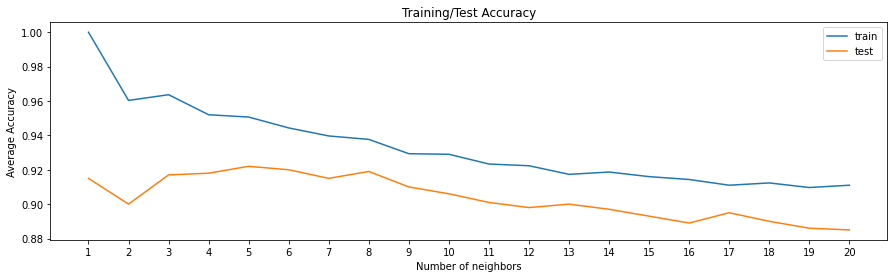

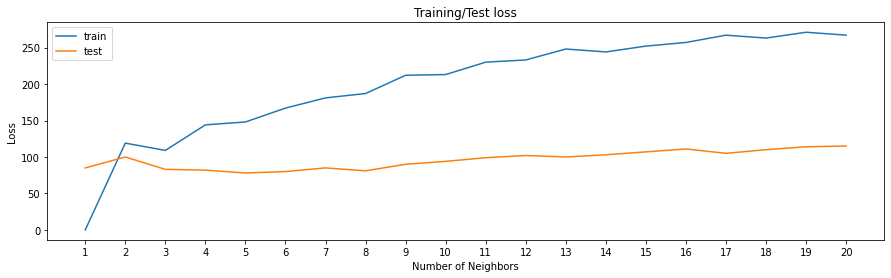

In [411]:
plt.figure(figsize=(15,4))
plt.title("Training/Test Accuracy")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
train_acc_results = []
test_acc_results = []
train_loss_results = []
test_loss_results = []
for k in k_neighbors:
    KNN = KNearestNeighbors(k,2)
    KNN.fit(X_train_small,y_train_small)
    y_train_pred = KNN.predict(X_train_small)
    y_test_pred = KNN.predict(X_test_small)
    train_acc = np.sum(y_train_pred == y_train_small)/y_train_small.shape[0]
    test_acc = np.sum(y_test_pred == y_test_small)/y_test_small.shape[0]
    train_loss = np.sum(y_train_pred!=y_train_small)
    test_loss = np.sum(y_test_pred!=y_test_small)
    train_loss_results.append(train_loss)
    test_loss_results.append(test_loss)
    train_acc_results.append(train_acc)
    test_acc_results.append(test_acc)
    
plt.plot(k_neighbors,train_acc_results,label='train')
plt.plot(k_neighbors,test_acc_results,label='test')
plt.legend()
plt.show()

plt.figure(figsize=(15,4))
plt.title("Training/Test loss")
plt.ylabel("Loss")
plt.xlabel("Number of Neighbors")
plt.xticks(k_neighbors)
plt.plot(k_neighbors,train_loss_results,label='train')
plt.plot(k_neighbors,test_loss_results,label='test')
plt.legend()
plt.show()

## Cross Validation with KNN

### b&c Implement LOOCV to estimate the rick of the k-NN rule for k and p $\in\{1,...,20\}$

In [9]:
def new_new_cross_val_score(X, y, distances, cv=5, k=5, p=2):
    fold_size = int(y.shape[0]/cv)
    indices = np.arange(y.shape[0])
    np.random.RandomState(123).shuffle(indices)
    result = np.array([])
    for i in range(cv):
        validation_idx = indices[i*fold_size:(i+1)*fold_size]
        train_idx = np.concatenate((indices[:i*fold_size], indices[(i+1)*fold_size:]))
        
        y_indices = np.argsort(distances[validation_idx][:,train_idx])
        k_closests = y[train_idx][y_indices[:,:k]].astype(int)
        bincount = np.array([np.count_nonzero(k_closests == j, axis = 1) for j in range(10)]).transpose()
        
        #random selection
        max_bin_values = np.amax(bincount,axis=1)
        a = np.array([bincount[j] == max_bin_values[j] for j in range(max_bin_values.shape[0])])
        y_pred = np.array([])
        for row in a:
            tmp = np.asarray(np.nonzero(row)).reshape(-1)
            y_pred = np.append(y_pred,np.random.choice(tmp,1,replace=False))      
#         y_pred = np.argmax(bincount,axis = 1)
        
        valid_acc = np.sum(y_pred == y[validation_idx])
        result = np.append(result,valid_acc/validation_idx.shape[0])
    
    return result

In [10]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')

In [11]:
distances = distance.pdist(X_train_small, 'minkowski', 2)
distances = distance.squareform(distances)

start validate 1  neighbors

finished, mean accuracy: 0.9193333333333333
start validate 2  neighbors

finished, mean accuracy: 0.906
start validate 3  neighbors

finished, mean accuracy: 0.9243333333333333
start validate 4  neighbors

finished, mean accuracy: 0.917
start validate 5  neighbors

finished, mean accuracy: 0.9206666666666666
start validate 6  neighbors

finished, mean accuracy: 0.919
start validate 7  neighbors

finished, mean accuracy: 0.917
start validate 8  neighbors

finished, mean accuracy: 0.913
start validate 9  neighbors

finished, mean accuracy: 0.9113333333333333
start validate 10  neighbors

finished, mean accuracy: 0.908
start validate 11  neighbors

finished, mean accuracy: 0.908
start validate 12  neighbors

finished, mean accuracy: 0.9056666666666666
start validate 13  neighbors

finished, mean accuracy: 0.9043333333333333
start validate 14  neighbors

finished, mean accuracy: 0.904
start validate 15  neighbors

finished, mean accuracy: 0.9036666666666666
sta

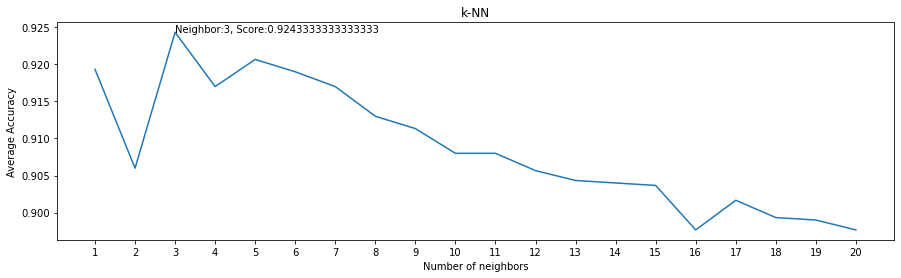

In [12]:
# plot the change in the average accuracy according to k
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
results = []
bn, bs = 0, 0
for k in k_neighbors:
    # k-fold cv from scratch for k-NN
    print("start validate", k," neighbors")
    acc = mean(new_new_cross_val_score(X_train_small, y_train_small, distances, cv=y_train_small.shape[0], k=k, p=2))
    results.append(acc)
    print("\nfinished, mean accuracy:",acc)
    if (bs < acc): 
        bn, bs = k, acc
plt.text(bn, bs, f'Neighbor:{bn}, Score:{bs}')
plt.plot(k_neighbors, results)
plt.show()

In [12]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')
n_powers = np.linspace(1,15,15,dtype = 'int')

Start validation: P:1, K:1
Finished, mean accuracy: 91.033%
Start validation: P:1, K:2
Finished, mean accuracy: 89.967%
Start validation: P:1, K:3
Finished, mean accuracy: 90.900%
Start validation: P:1, K:4
Finished, mean accuracy: 90.800%
Start validation: P:1, K:5
Finished, mean accuracy: 90.633%
Start validation: P:1, K:6
Finished, mean accuracy: 90.300%
Start validation: P:1, K:7
Finished, mean accuracy: 89.933%
Start validation: P:1, K:8
Finished, mean accuracy: 90.267%
Start validation: P:1, K:9
Finished, mean accuracy: 89.900%
Start validation: P:1, K:10
Finished, mean accuracy: 89.500%
Start validation: P:1, K:11
Finished, mean accuracy: 89.833%
Start validation: P:1, K:12
Finished, mean accuracy: 89.567%
Start validation: P:1, K:13
Finished, mean accuracy: 89.433%
Start validation: P:1, K:14
Finished, mean accuracy: 89.233%
Start validation: P:1, K:15
Finished, mean accuracy: 89.000%
Start validation: P:1, K:16
Finished, mean accuracy: 89.033%
Start validation: P:1, K:17
Finis

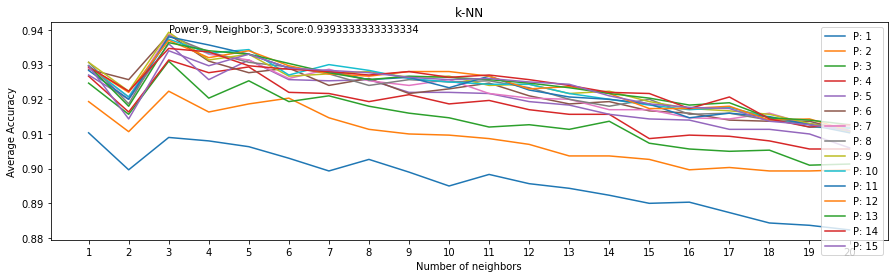

In [14]:
# plot the change in the average accuracy according to k
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
bp, bn, bs = 0, 0, 0
for p in n_powers:
    results = []
    distances = distance.pdist(X_train_small, 'minkowski', p)
    distances = distance.squareform(distances)
    for k in k_neighbors:
        print(f'Start validation: P:{p}, K:{k}')
        acc = mean(new_new_cross_val_score(X_train_small, y_train_small, distances, cv=y_train_small.shape[0], k=k, p=2))
        if bs < acc: bp, bn, bs = p, k, acc
        results.append(acc)
        print(f"Finished, mean accuracy: {acc:.3%}")
    plt.plot(k_neighbors, results, label=f'P: {p}')
        
plt.text(bn, bs, f'Power:{bp}, Neighbor:{bn}, Score:{bs}')
plt.legend()
plt.show()

## d.Improve performance of k-NN by data preprocessing

In [13]:
from scipy.stats import norm
import math
from sklearn import preprocessing
def get_nth_quartile(data, n):  
    if n < 1 or n > 3:
        return false
    data.sort()
    position = 1 + (len(data)-1)*n/4
    pos_integer = int(math.modf(position)[1])
    pos_decimal = position - pos_integer
    quartile = data[pos_integer - 1] + (data[pos_integer] - data[pos_integer - 1])*pos_decimal
    return quartile

def min_max_scaling(data):
    return np.where(data.ptp(0) == 0, data, (data - data.min(0)) / data.ptp(0))

def standard_scaling(data):
    return preprocessing.normalize(data)

def max_abs_scaling(data):
    return np.where(abs(data.max(0)) == 0, data, data / abs(data.max(0)))

def robust_scaling(data):
#     return RobustScaler().fit(data).transform(data)
    temp=data.copy()
    tmp = data.copy()
    for i in range(len(tmp)):
        quartile=get_nth_quartile(tmp[i],1)
        quartiletre=get_nth_quartile(tmp[i],3)
        median=get_nth_quartile(tmp[i],2)
        if quartiletre-quartile != 0:
            temp[i]=[((temp[i][j] - median) / (quartiletre-quartile)) for j in range(len(temp[i]))]
    return temp

def unit_scaling(data):
    temp=np.ndarray(data.shape)
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] != 0:
                temp[i][j]=1
    return temp


In [14]:
X_train_mm = min_max_scaling(X_train_small)
X_test_mm = min_max_scaling(X_test_small)

<ipython-input-13-78f5d62d4de7>:15: RuntimeWarning: invalid value encountered in true_divide
  return np.where(data.ptp(0) == 0, data, (data - data.min(0)) / data.ptp(0))


In [15]:
X_train_ma = max_abs_scaling(X_train_small)
X_test_ma = max_abs_scaling(X_test_small)

<ipython-input-13-78f5d62d4de7>:21: RuntimeWarning: invalid value encountered in true_divide
  return np.where(abs(data.max(0)) == 0, data, data / abs(data.max(0)))


In [16]:
X_train_nr = standard_scaling(X_train_small)
X_test_nr = standard_scaling(X_test_small)

In [17]:
X_train_rs = robust_scaling(X_train_small)
X_test_rs = robust_scaling(X_test_small)

In [18]:
X_train_unit = unit_scaling(X_train_small)
X_test_unit = unit_scaling(X_test_small)

In [19]:
k_neighbors = np.linspace(1, 5, 5, dtype='int')
distances_mm = distance.pdist(X_train_mm, 'minkowski', 2)
distances_mm = distance.squareform(distances_mm)

distances_ma = distance.pdist(X_train_ma, 'minkowski', 2)
distances_ma = distance.squareform(distances_ma)

distances_nr = distance.pdist(X_train_nr, 'minkowski', 2)
distances_nr = distance.squareform(distances_nr)

In [20]:
distances_rs = distance.pdist(X_train_rs, 'minkowski', 2)
distances_rs = distance.squareform(distances_rs)

In [21]:
distances_unit = distance.pdist(X_train_unit, 'minkowski', 2)
distances_unit = distance.squareform(distances_unit)

In [22]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')

start validate 1  neighbors
mm finished
start validate 2  neighbors
mm finished
start validate 3  neighbors
mm finished
start validate 4  neighbors
mm finished
start validate 5  neighbors
mm finished
start validate 6  neighbors
mm finished
start validate 7  neighbors
mm finished
start validate 8  neighbors
mm finished
start validate 9  neighbors
mm finished
start validate 10  neighbors
mm finished
start validate 11  neighbors
mm finished
start validate 12  neighbors
mm finished
start validate 13  neighbors
mm finished
start validate 14  neighbors
mm finished
start validate 15  neighbors
mm finished
start validate 16  neighbors
mm finished
start validate 17  neighbors
mm finished
start validate 18  neighbors
mm finished
start validate 19  neighbors
mm finished
start validate 20  neighbors
mm finished


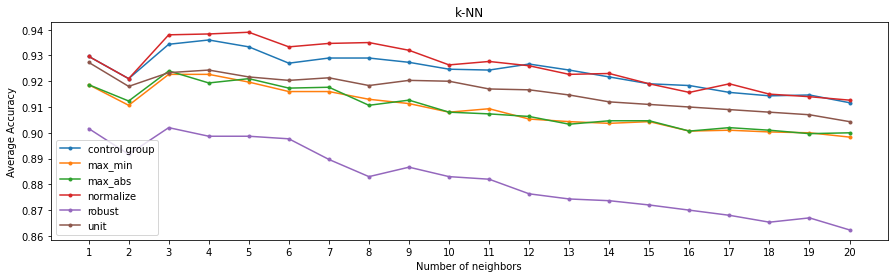

In [25]:
# plot the change in the average accuracy according to k
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
knn0 = []
knn1 = []
knn2 = []
knn3 = []
knn4 = []
knn5 = []


for k in k_neighbors:
    print("start validate", k," neighbors")
    # k-fold cv from scratch for k-NN
    acc0 = mean(new_new_cross_val_score(X_train_small,y_train_small,distances, cv=y_train_small.shape[0], k=k, p=2))
    acc1 = mean(new_new_cross_val_score(X_train_mm,y_train_small,distances_mm, cv=y_train_small.shape[0], k=k, p=2))
    print("mm finished")
    acc2 = mean(new_new_cross_val_score(X_train_ma,y_train_small,distances_ma, cv=y_train_small.shape[0], k=k, p=2))
    acc3 = mean(new_new_cross_val_score(X_train_nr,y_train_small,distances_nr, cv=y_train_small.shape[0], k=k, p=2))
    acc4 = mean(new_new_cross_val_score(X_train_rs,y_train_small,distances_rs, cv=y_train_small.shape[0], k=k, p=2))
    acc5 = mean(new_new_cross_val_score(X_train_unit,y_train_small,distances_unit, cv=y_train_small.shape[0], k=k, p=2))
    knn0.append(acc0)
    knn1.append(acc1)
    knn2.append(acc2)
    knn3.append(acc3)
    knn4.append(acc4)
    knn5.append(acc5)

plt.plot(k_neighbors, knn0, label="control group",marker='.')
plt.plot(k_neighbors, knn1, label="max_min",marker='.')
plt.plot(k_neighbors, knn2, label="max_abs",marker='.')
plt.plot(k_neighbors, knn3, label="normalize",marker='.')
plt.plot(k_neighbors, knn4, label="robust",marker='.')
plt.plot(k_neighbors, knn5, label="unit",marker='.')
plt.legend()
plt.show()

## e.

In [11]:
train_big = np.genfromtxt(
        'datasets/MNIST_train.csv', delimiter=',')
test_big = np.genfromtxt('datasets/MNIST_test.csv', delimiter=',')

In [12]:
X_train, y_train, X_test, y_test = train_big[:,1:], train_big[:,0], test_big[:,1:], test_big[:,0]

In [26]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')

In [31]:
def big_data_correct(X, y, distances, cv=5, k=5, p=2):
    fold_size = int(y.shape[0]/cv)
    indices = np.arange(y.shape[0])
    np.random.RandomState(123).shuffle(indices)
    result = np.array([])
    for i in range(cv):
        validation_idx = indices[i*fold_size:(i+1)*fold_size]
        train_idx = np.concatenate((indices[:i*fold_size], indices[(i+1)*fold_size:]))
        
        y_indices = np.argsort(distances[validation_idx][:,train_idx])
        k_closests = y[train_idx][y_indices[:,:k]].astype(int)
        bincount = np.array([np.count_nonzero(k_closests == j, axis = 1) for j in range(10)]).transpose()
        
        #random selection
        max_bin_values = np.amax(bincount,axis=1)
        a = np.array([bincount[j] == max_bin_values[j] for j in range(max_bin_values.shape[0])])
        y_pred = np.array([])
        for row in a:
            tmp = np.asarray(np.nonzero(row)).reshape(-1)
            y_pred = np.append(y_pred,np.random.choice(tmp,1,replace=False))      
#         y_pred = np.argmax(bincount,axis = 1)
        
        valid_acc = np.sum(y_pred == y[validation_idx])
        result = np.append(result,valid_acc)
    
    return mean(result)

def merge_big_to_score(X,y,cv):
    correctness=0
    tile_size=3000
    for i in range(20):
        start=time.time()
        distances = distance.pdist(X[i*tile_size:(i+1)*tile_size-1,:], 'minkowski', 2)
        distances = distance.squareform(distances)
        correctness=correctness+big_data_correct(X[i*tile_size:(i+1)*tile_size-1,:],
                                                 y[i*tile_size:(i+1)*tile_size-1],
                                                 distances, cv=cv, k=5, p=2)
        print("time",time.time()-start)
    acc=correctness/(60000/cv)
    print("acc",acc)
    return acc

merge_big_to_score(X_train,y_train,5)

time 66.60462212562561
time 68.51681661605835
time 62.25459599494934
time 65.67874646186829
time 62.796804666519165
time 61.81477975845337
time 64.46034669876099
time 67.4087553024292
time 66.20035409927368
time 64.7171905040741
time 63.273842096328735
time 63.30822491645813
time 67.256178855896
time 67.21090459823608
time 66.36603593826294
time 67.57920002937317
time 70.52592611312866
time 68.52852439880371
time 62.32043409347534
time 69.30638313293457
acc 0.9175166666666664


0.9175166666666664

## PCA: Dimensionality Reduction

In [55]:
train_small = np.genfromtxt(
        'datasets/MNIST_train_small.csv', delimiter=',')
test_small = np.genfromtxt('datasets/MNIST_test_small.csv', delimiter=',')

In [56]:
X_train_small, y_train_small, X_test_small, y_test_small = train_small[:,1:], train_small[:,0], test_small[:,1:], test_small[:,0]

In [57]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_small)
# X_test_pca = pca.transform(X_test_small)
# X_train_pca = pca.fit_transform(train_small[:,1:])
# X_test_pca = pca.transform(test_small[:,1:])
# print(X_train_pca.shape)

In [58]:
n_components = np.linspace(5,50,10, dtype='int')
k_neighbors = np.linspace(1,20,10, dtype='int')
# print(k_neighbors)

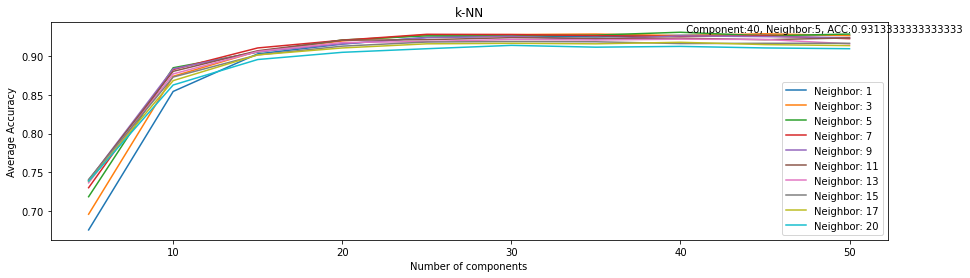

In [59]:
# plot the change in the average accuracy according to k
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xlabel("Number of components")
plt.ylabel("Average Accuracy")
bc, bn, bs = 0, 0, 0
for k in k_neighbors:
    knn = []
    for n_component in n_components:
        pca = PCA(n_components=n_component)
        X_train_pca = pca.fit_transform(X_train_small)
#         start=time.time()
        distances = distance.pdist(X_train_pca, 'minkowski', 2)
        distances = distance.squareform(distances)
        score = mean(new_new_cross_val_score(X_train_pca, y_train_small, distances, cv=5, k=k, p=2))
#         print(time.time()-start)
#         print(X_train_pca.shape)
        if score > bs:
            bc, bn, bs = n_component, k, score
        knn.append(score)
    plt.plot(n_components, knn, label=f'Neighbor: {k}')
plt.text(bc, bs,f"  Component:{bc}, Neighbor:{bn}, ACC:{bs}")
plt.legend()
plt.show()